In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import os

In [2]:
def Extracting_green_pink_areas_Denoising_OpenCV(filename, ShowImage, MinHueGreen, MaxHueGreen, MinSatGreen, MaxSatGreen, MinValueGreen, MaxValueGreen, MinHuePink, MaxHuePink, MinSatPink, MaxSatPink, MinValuePink, MaxValuePink):

    # Load and denoise image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_denoised = cv2.fastNlMeansDenoisingColored(img, None, 3, 3, 7, 15)

    # Convert to HSV
    img_hsv = cv2.cvtColor(img_denoised, cv2.COLOR_RGB2HSV)

    # Extract green and pink masks
    mask_green = cv2.inRange(img_hsv, lowerb=(MinHueGreen, MinSatGreen, MinValueGreen), upperb=(MaxHueGreen, MaxSatGreen, MaxValueGreen))
    mask_pink_s = cv2.inRange(img_hsv, (MinHuePink, MinSatPink, MinValuePink), (MaxHuePink, MaxSatPink, MaxValuePink))
    mask_pink = np.bitwise_or(mask_pink_s,mask_green)

    # Calculate masked areas and intensities
    img_masked_green = cv2.bitwise_and(img, img, mask=mask_green)
    img_masked_saturation_green = img_hsv[:,:,1]/255*mask_green
    img_masked_pink = cv2.bitwise_and(img, img, mask=mask_pink)
    img_masked_saturation_pink = img_hsv[:,:,1]/255*mask_pink

    # Save masked intensities and masked areas
    cv2.imwrite(filename[:-4]+'_GreenSignalIntensityDensity.png', img_masked_saturation_green)
    cv2.imwrite(filename[:-4]+'_GreenAreaDensity.png', mask_green)
    cv2.imwrite(filename[:-4]+'_PinkSignalIntensityDensity.png', img_masked_saturation_pink)
    cv2.imwrite(filename[:-4]+'_PinkAreaDensity.png', mask_pink)

    # Show results if requested
    if ShowImage==1:
      fig, ax = plt.subplots(1, 3, figsize=(18, 6))
      # Turn off axes and grids
      for col in range(3):
          ax[col].grid(False)
          ax[col].axis("off")
      ax[0].imshow(img)
      ax[0].set_title('Input Image')
      ax[1].imshow(img_denoised)
      ax[1].set_title('Denoised Image')
      ax[2].imshow(img_hsv)
      ax[2].set_title('HSV Image')
      fig.tight_layout()


      fig, ax = plt.subplots(1, 3, figsize=(18, 6))
      # Turn off axes and grids
      for col in range(3):
          ax[col].grid(False)
          ax[col].axis("off")
      ax[0].imshow(img)
      ax[0].set_title('Input Image')
      ax[1].imshow(mask_green, cmap='gray')
      ax[1].set_title('Green Mask')
      ax[2].imshow(img_masked_saturation_green, cmap='gray')
      ax[2].set_title('Green Intensity')
      fig.tight_layout()


      fig, ax = plt.subplots(1, 3, figsize=(18, 6))
      # Turn off axes and grids
      for col in range(3):
          ax[col].grid(False)
          ax[col].axis("off")
      ax[0].imshow(img)
      ax[0].set_title('Input Image')
      ax[1].imshow(mask_pink, cmap='gray')
      ax[1].set_title('Pink Mask')
      ax[2].imshow(img_masked_saturation_pink, cmap='gray')
      ax[2].set_title('Pink Intensity')
      fig.tight_layout()

    # Return area and intensity values
    return np.sum(img_masked_saturation_green), np.sum(mask_green), np.sum(img_masked_saturation_pink), np.sum(mask_pink), img_masked_saturation_green.shape[0]*img_masked_saturation_green.shape[1]

(2635320.0, 14617365, 34456187.0, 175382115, 1443520)

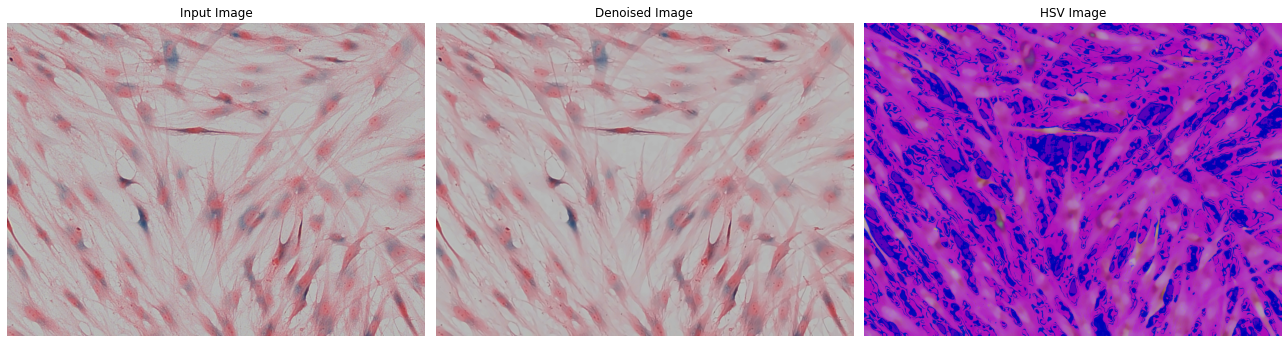

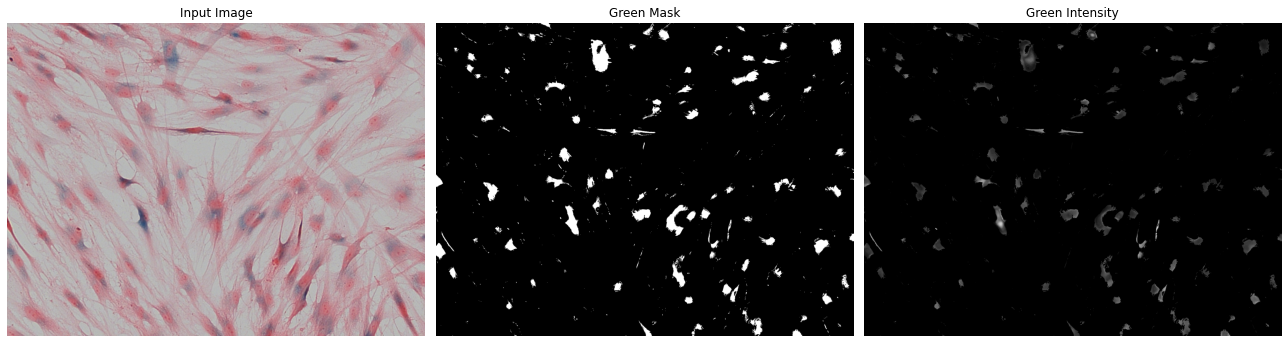

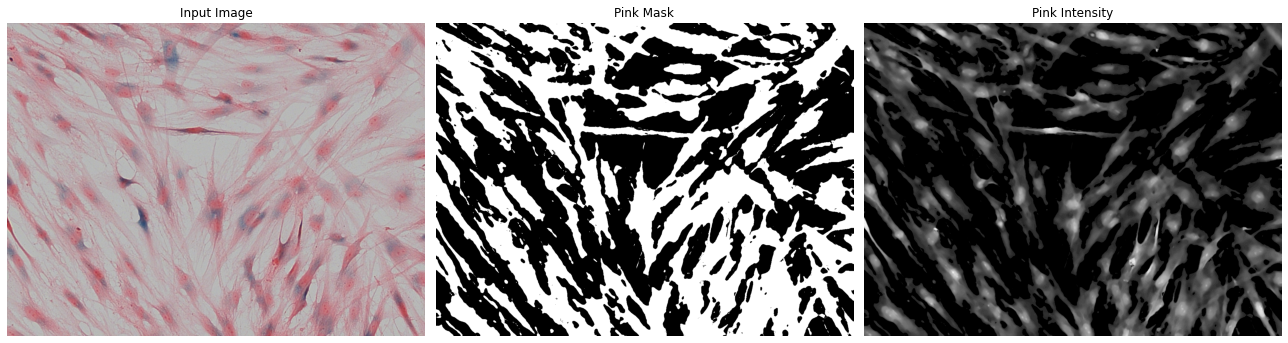

In [5]:
filename = 'Image\\Directory\\img.tiff'
Extracting_green_pink_areas_Denoising_OpenCV(filename, 1, 100, 170, 0, 255, 80, 170, 150, 180, 23, 125, 0, 255)

In [ ]:
df = pd.DataFrame(columns=['Folder Name','Image Name','Green Signal Intensity Value','Green Area Value','Pink Signal Intensity Value','Pink Area Value','Total Area Pixels',
                           'Green Signal Intensity Density in Total','Green Area Density in Total','Pink Signal Intensity Density in Total','Pink Area Density in Total',
                           'Green Signal Intensity Density in Pink Area','Green Area Density in Pink Area'])

In [ ]:
df.head()

,Folder Name,Image Name,Green Signal Intensity Value,Green Area Value,Pink Signal Intensity Value,Pink Area Value,Total Area Pixels,Green Signal Intensity Density in Total,Green Area Density in Total,Pink Signal Intensity Density in Total,Pink Area Density in Total,Green Signal Intensity Density in Pink Area,Green Area Density in Pink Area


In [9]:
df = pd.DataFrame(columns=['Folder Name','Image Name','GS: Green Signal Intensity Value','GA: Green Area Value','PS: Pink Signal Intensity Value','PA: Pink Area Value','TA: Total Area Pixels',
                           'GS/TA: Green Signal Intensity Density in Total','GA/TA: Green Area Density in Total','PS/TA: Pink Signal Intensity Density in Total','PA/TA: Pink Area Density in Total',
                           'GS/PA: Green Signal Intensity Density in Pink Area','GA/PA: Green Area Density in Pink Area'])


for filename in os.listdir('Image\\Directory\\'):
    if filename[-4:]=='tiff':
        INPUT_DIR = 'Image\\Directory\\' + filename
        Extrated = Extracting_green_pink_areas_Denoising_OpenCV(INPUT_DIR, 0, 100, 170, 0, 255, 80, 170, 150, 180, 23, 125, 0, 255)
        new_row = {'Folder Name': subfolder1,'Image Name':filename,'GS: Green Signal Intensity Value':Extrated[0],'GA: Green Area Value':Extrated[1],'PS: Pink Signal Intensity Value':Extrated[2],'PA: Pink Area Value':Extrated[3],'TA: Total Area Pixels':Extrated[4]}
        df = df.append(new_row, ignore_index=True)

In [ ]:
df.to_csv('Image\\Directory\\results.csv', index=False)